# Pymaceuticals Inc.
---

### Analysis

- Capomulin is effective at reducing tumor size in mice.
- There is a loose positive correlation between tumor size and mouse weight.
- A near equal amount of male and female mice were tested.
- Infubinol does not seem very effective at reducing tumor size but does have an outlier where tumor size matched that of the Capomulin treatment.  More study should be done to determine if Infubinol has potiential to reduce tumor size in unique cases.  
 

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata,study_results,on="Mouse ID")
# Display the data table for preview
mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [27]:
# Checking the number of mice.
number_of_mice = len(mouse_study.groupby("Mouse ID"))
number_of_mice

249

In [28]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_study.duplicated()

duplicate_id_df = mouse_study.loc[duplicates,"Mouse ID"]

duplicate_id_string = str(duplicate_id_df.iloc[0])

duplicate_id_string

'g989'

In [29]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_data_for_mouse_id = mouse_study[mouse_study["Mouse ID"] == duplicate_id_string]
all_duplicate_data_for_mouse_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [30]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_without_duplicates = mouse_study.loc[mouse_study["Mouse ID"] != duplicate_id_string]
mouse_study_without_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [31]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = len(mouse_study_without_duplicates.groupby("Mouse ID"))
number_of_mice

248

## Summary Statistics

In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_group = mouse_study_without_duplicates.groupby("Drug Regimen")
tumor_volume = drug_group["Tumor Volume (mm3)"]

drug_group_mean = tumor_volume.mean()
drug_group_median = tumor_volume.median()
drug_group_variance = tumor_volume.var()
drug_group_stdev = tumor_volume.std()
drug_group_sem = tumor_volume.sem()

tumor_summary = pd.DataFrame({"Mean Tumor Volume":drug_group_mean,
                              "Median Tumor Volume":drug_group_median,
                              "Tumor Volume Variance":drug_group_variance,
                              "Tumor Volume Standard Deviation":drug_group_stdev,
                              "Tumor Volume SEM":drug_group_sem
                              })
tumor_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
tumor_summary_agg = tumor_volume.agg(["mean","median","var","std","sem"])
tumor_summary_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Timepoint, dtype: int64

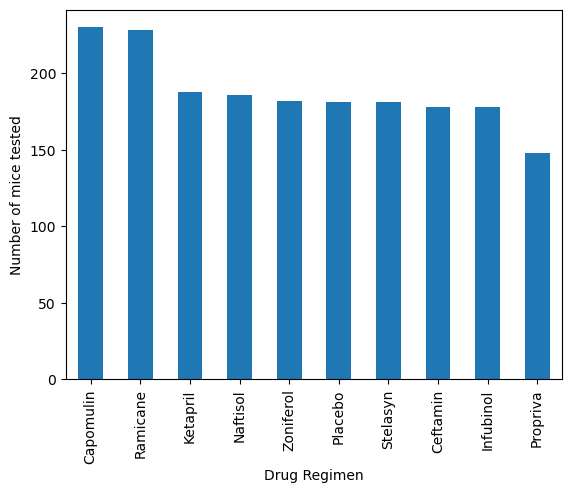

In [34]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
counts = mouse_study_without_duplicates.groupby("Drug Regimen")["Timepoint"].count()
counts = counts.sort_values(ascending=False)
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice tested")
counts

Text(0, 0.5, 'Number of mice tested')

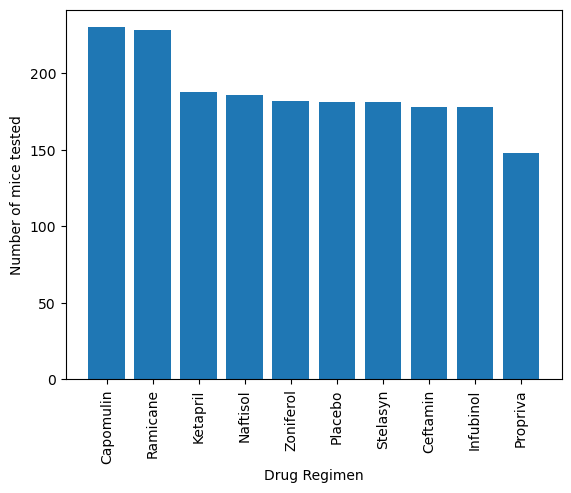

In [35]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(counts.index, counts.values)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice tested")

<Axes: ylabel='Sex'>

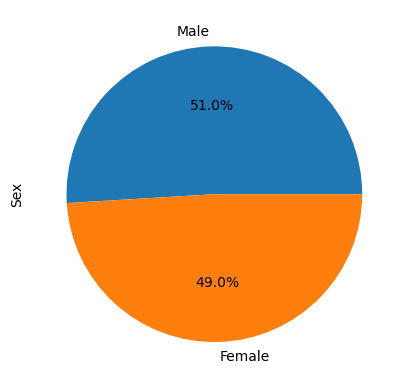

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_gender = mouse_study_without_duplicates["Sex"].value_counts()
mouse_gender.plot(kind="pie", autopct="%1.1f%%")

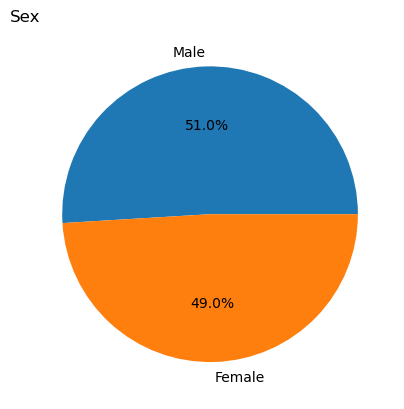

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_gender,labels=["Male", "Female"],autopct="%1.1f%%")
plt.title("Sex").set_position([0,1])


## Quartiles, Outliers and Boxplots

In [38]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = mouse_study_without_duplicates.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_timepoint_mouse_study = pd.merge(max_timepoints,mouse_study_without_duplicates, on=["Mouse ID", "Timepoint"])
max_timepoint_mouse_study

max_timepoints

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [39]:
# Put treatments into a list for for loop (and later for plot labels) #Tumor Volume (mm3)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatment_list:
    tumor_volume_data.append(max_timepoint_mouse_study[max_timepoint_mouse_study["Drug Regimen"] == treatment]["Tumor Volume (mm3)"])
    
    # add subset 
tumor_volume_data = pd.DataFrame(tumor_volume_data[0])
    
    # Determine outliers using upper and lower bounds
quartiles = tumor_volume_data["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
outlier_tumor = tumor_volume_data.loc[(tumor_volume_data["Tumor Volume (mm3)"] < lowerq) | (tumor_volume_data['Tumor Volume (mm3)'] > upperq)]
outlier_tumor

,Tumor Volume (mm3)
61,30.485985
80,47.685963
108,41.483008
121,28.430964
162,46.539206
169,41.581521
174,23.343598
180,40.728578
192,31.023923
204,40.658124


Text(0, 0.5, 'Final Tumor Volume (mm3)')

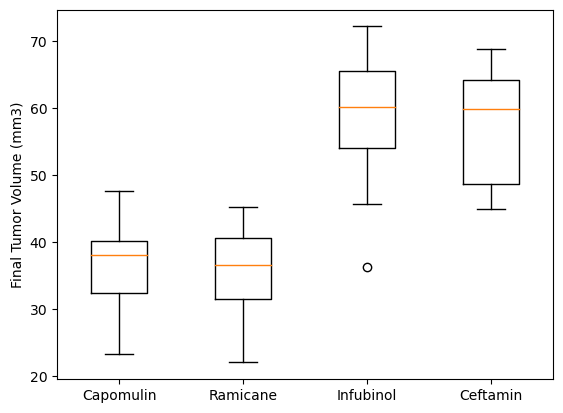

In [40]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
capomulin = max_timepoint_mouse_study[max_timepoint_mouse_study["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
ramicane = max_timepoint_mouse_study[max_timepoint_mouse_study["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"]
infubinol = max_timepoint_mouse_study[max_timepoint_mouse_study["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]
ceftamin = max_timepoint_mouse_study[max_timepoint_mouse_study["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]
fig, ax1 = plt.subplots()
ax1.boxplot([capomulin,ramicane,infubinol,ceftamin])
ax1.set_xticklabels(["Capomulin", "Ramicane", "Infubinol","Ceftamin"])
ax1.set_ylabel("Final Tumor Volume (mm3)")

## Line and Scatter Plots

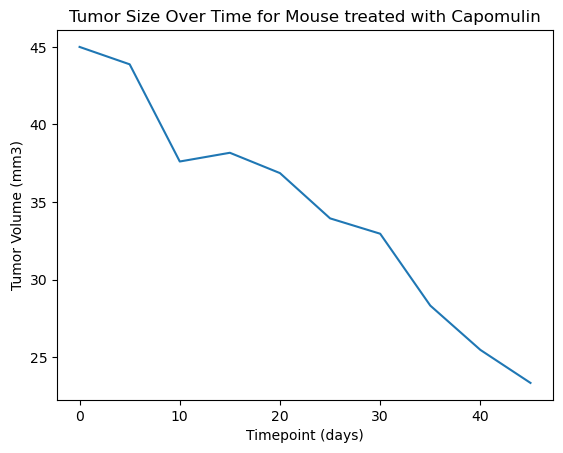

In [41]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = mouse_study_without_duplicates[mouse_study_without_duplicates["Drug Regimen"] == "Capomulin"]
capomulin_mouse_data = pd.DataFrame(capomulin_data[capomulin_data["Mouse ID"] == "s185"])
capomulin_mouse_data = capomulin_mouse_data[["Timepoint", "Tumor Volume (mm3)"]]

plt.plot(capomulin_mouse_data["Timepoint"], capomulin_mouse_data["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Size Over Time for Mouse treated with Capomulin")
plt.show()


Text(0.5, 1.0, 'Tumor Volume vs. Mouse Weight')

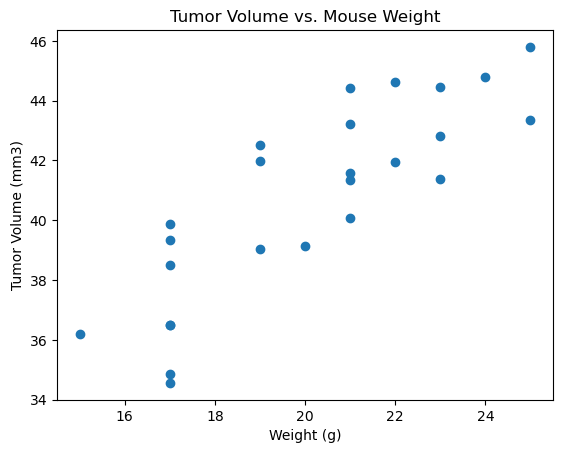

In [42]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
grouped_capomulin_data = capomulin_data.groupby("Mouse ID").agg({"Tumor Volume (mm3)": "mean", "Weight (g)": "mean"})
scatter_plot_data = grouped_capomulin_data.reset_index()[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
plt.scatter(scatter_plot_data["Weight (g)"], scatter_plot_data["Tumor Volume (mm3)"])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs. Mouse Weight')


## Correlation and Regression

The correleation coefficient is: 0.525699555207717


Text(0.5, 1.0, 'Tumor Volume vs. Mouse Weight')

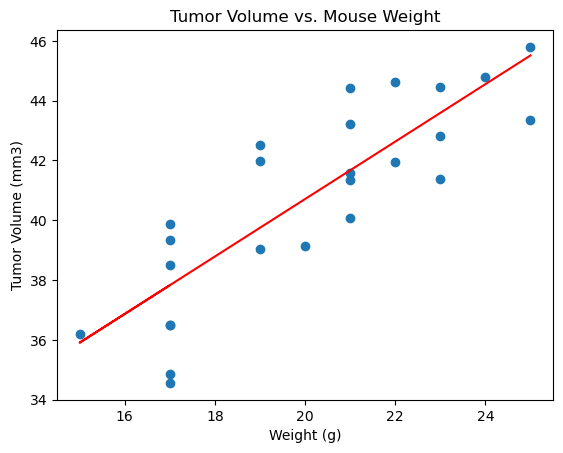

In [43]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation_coefficient, _ = st.pearsonr(capomulin_data["Weight (g)"], capomulin_data["Tumor Volume (mm3)"])
print("The correleation coefficient is: " + str(correlation_coefficient))

slope, intercept, rvalue, pvalue, stderr = st.linregress(capomulin_data["Weight (g)"], capomulin_data["Tumor Volume (mm3)"])

x = capomulin_data["Weight (g)"]
y = slope * x + intercept
plt.plot(x, y, color="red")
plt.scatter(scatter_plot_data["Weight (g)"], scatter_plot_data["Tumor Volume (mm3)"])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs. Mouse Weight')
